# Loading the data

,MUNICIPIO,Y,X,W1,W2,N
1,Rio de Janeiro,0.468,0.1103315,0.0956015,0.1260355,13967
2,São Paulo,0.474,0.06923765,0.06046832,0.08189227,12291
3,Belo Horizonte,0.469,0.08681341,0.07481126,0.1047766,4861
4,Porto Alegre,0.464,0.09200196,0.0769549,0.1139241,4076
5,São Bernardo do Campo,0.483,0.1388227,0.1252115,0.1595197,2939
6,Curitiba,0.477,0.086121,0.06535142,0.1144781,2810
7,Brasília,0.478,0.1049815,0.09445746,0.1167247,2429
8,Recife,0.462,0.08801415,0.07674597,0.1033403,2261
9,Fortaleza,0.468,0.09837134,0.08342362,0.120915,1535
10,Goiânia,0.477,0.07515234,0.07344633,0.0777027,1477


[1] "Mean of male support to Dilma over cities: 0.083678%"

[1] "Mean of female support to Dilma over cities: 0.121508%"

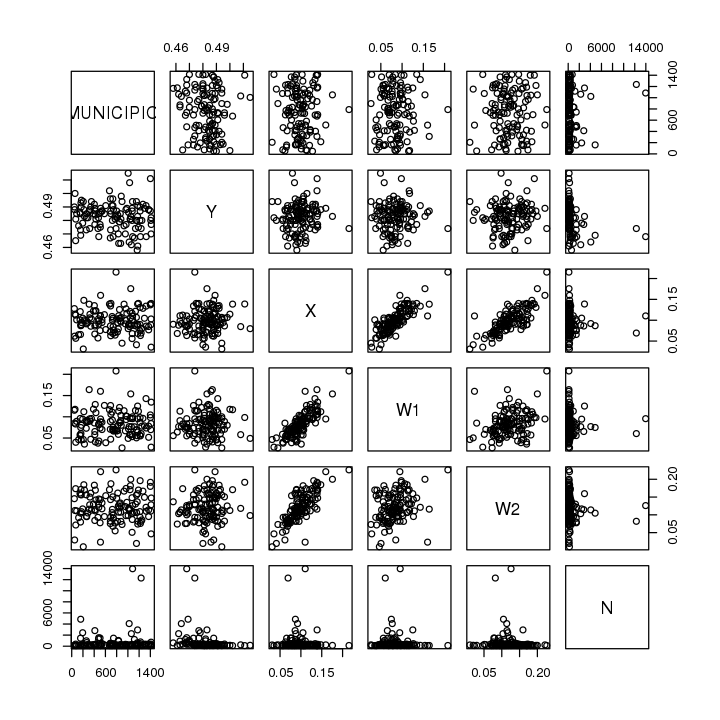

In [1]:
gender_data = read.csv("../data/social_genero.csv")
#using only samples with more than 100 microdata
gender_data = gender_data[gender_data$N>100,]
gender_data[1:10,]
sprintf("Mean of male support to Dilma over cities: %f%%", mean(gender_data$W1)) 
sprintf("Mean of female support to Dilma over cities: %f%%", mean(gender_data$W2)) 
options(repr.plot.width=6, repr.plot.height=6)
plot(gender_data)

# Notation and Variables

* Y = % of male citizens in city
* X = % of users who publish positive posts about Dilma
* W1 = % of male who publish positive posts about Dilma
* W2 = % of female who publish positive posts about Dilma
* N = Number of people sampled

# Is there a correlation between aggregate gender and support to Dilma over cities?

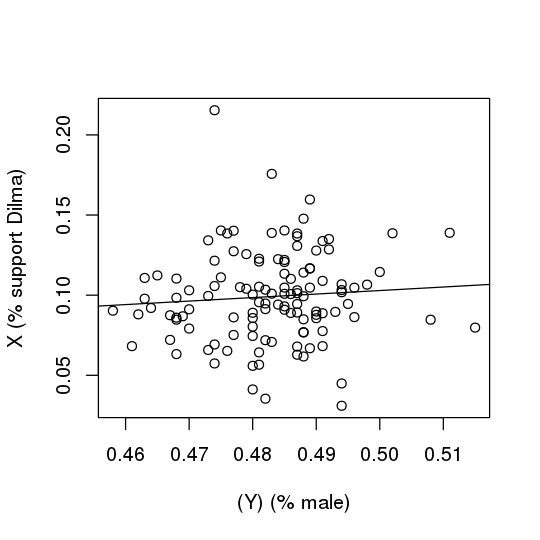

In [5]:
plot(gender_data$Y, (gender_data$X),xlab="(Y) (% male)", ylab="X (% support Dilma)")
options(repr.plot.width=4.5, repr.plot.height=4.5)
fit <- lm( gender_data$X ~ (gender_data$Y) )
abline(fit)

# Using ground-truth of inner cells we can see correlation between observed male and female support to Dilma 

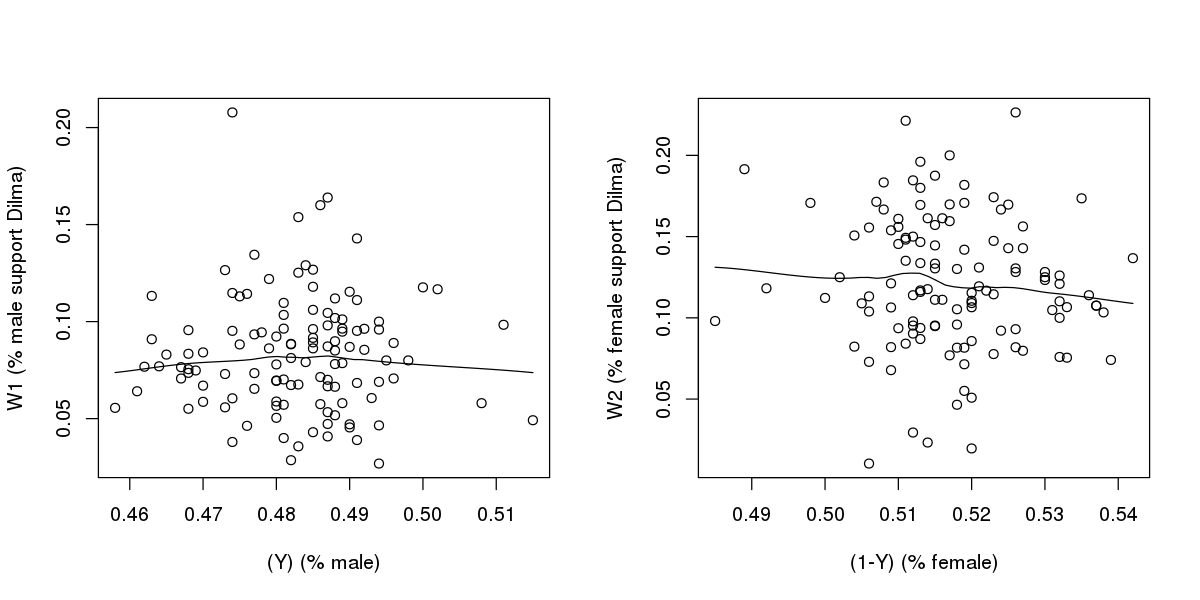

In [6]:
require(graphics)
par(mfrow=c(1,2))
options(repr.plot.width=10, repr.plot.height=5)
scatter.smooth(gender_data$Y, gender_data$W1 ,xlab="(Y) (% male)", ylab="W1 (% male support Dilma)")
scatter.smooth(1-gender_data$Y, gender_data$W2,xlab="(1-Y) (% female)", ylab="W2 (% female support Dilma)")

# Tomography plot (Tá certo isso msm?!)

[1] 0

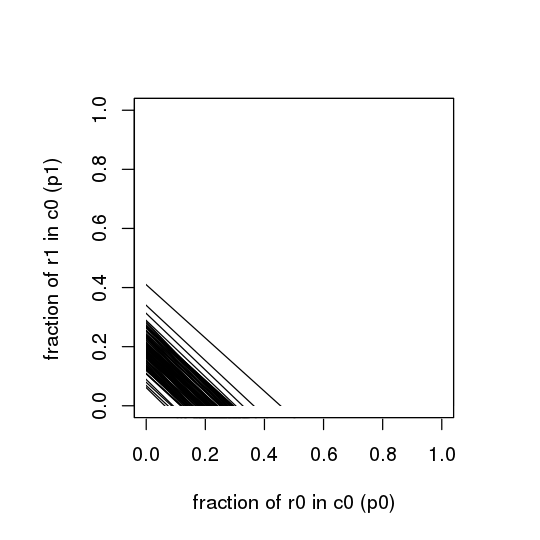

In [7]:
library(MCMCpack)
par(mfrow=c(1,1))
options(repr.plot.width=4.5, repr.plot.height=4.5)
c0= (gender_data$X)
c1= (1-gender_data$X)
r0 = gender_data$Y 
r1 = (1- gender_data$Y)
tomogplot(r0, r1, c0, c1)